# Predicting the fares of the airways using Machine Learning algorithm!!

Traveling is one of the most enjoyable activities, and everyone wishes to avoid the city congestion. Going to another island with its own natural beauty gives you a fresh perspective on new things. The Indian, with its individuality, is one of the most interesting cities in the world, bringing with it a plethora of amazing islands. 
Technology can provide a solution by implementing machine learning techniques to reduce the uncertainty of future flight pricing. We'll be using the Flight Price's Flight Price Dataset. This dataset contains 10683 entries with 11 columns that detail flights in India by various domestic and international airlines in 2019. We will use machine learning techniques to evaluate this dataset in order to forecast the price of an airline ticket based on the features supplied in the dataset's columns.

## This notebook contains,
 1. Data loading and Cleaning.
 2. Exploratory Data Analysis. 
 3. Modelling.

## Importing the required libraries!

1. importing numpy to perform various mathematcial operations on arrays.
2. importing pandas for performing data manipulation and analysis.
3. importing matplotlib to generate line plots,scatter plots,histogram.
4. importing scipy for the scientific computation based on Numpy.
5. importing missingno for the understanding of the structure of dataset.

In [4]:
# importing the libraries related to the data manipulation.
import numpy as np
import pandas as pd

# importing the libraries related to the data_visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

read_csv is an important pandas function to read the csv files and do operations on it. and df.head() returns the 1st 5 rows.
"linear-comprehensive-covid-data" is the data we are working with.

In [5]:
# data_path = "C:\Users\SAMARTH P SHET\linear-comprehensive-covid-data.csv"

df = pd.read_excel(r'C:\Users\SAMARTH P SHET\Python\python works\airData_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.shape

(10683, 11)

The shape of the dataset is `11 columns` & `10683 rows`

In [7]:
#Using the 'isnull().sum()' function, one can find the number of missing values per column.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there are few `null` values as shown above

In [8]:
#The method .info() provides information about the given DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we can see there are only few null values in the dataset

In [9]:
#As there is few null values, we'll drop the null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Hence, the dataset is clean!

In [11]:
# Using dtypes, we can see the type of each column
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

From the above description we can see that the `Date_of_Journey` is a object data type,

Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,because our model will not be able to understand Theses string values,it just understand Time-stamp
For this we require pandas `to_datetime` to convert `object` data type to `datetime` dtype.


`dt.day` method will extract only day of that date

`dt.month` method will extract only month of that date

In [12]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [13]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [14]:
# converting the date of journey, departure time, arrival time

for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [15]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

As we can see the respective columns have changed from the `object type` to the `datetime type`

In [16]:
# seperating the day and month column into new column which helps the model in training.

#date/day
df['Journey_day'] = df['Date_of_Journey'].dt.day

# month
df['Journey_month'] = df['Date_of_Journey'].dt.month

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-17 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-17 05:50:00,2021-06-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-17 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-17 18:05:00,2021-06-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-17 16:50:00,2021-06-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


As we can see that the two columns have been added!

In [18]:
# Now, we see that in dep-time and arrival_time are in date and time, so that we'll now split date and time

# extracting the hour part in time
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
# extracting the minute part in time
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute

In [19]:
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [20]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

# Extracting Minutes
extract_min(df,'Dep_Time')

# Now we can drop Dep_Time as it is of no use
drop_column(df,'Dep_Time')

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-17 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-17 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-17 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [22]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(df,'Arrival_Time')

# Extracting minutes
extract_min(df,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(df,'Arrival_Time')

In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


## Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [24]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
    

In [25]:
df['Duration']=duration

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [27]:
# seperating the hour and minutes into number which helps the machine learning algorithm

# hours
def hour(x):
    return x.split(' ')[0][0:-1]

# minutes
def min(x):
    return x.split(' ')[1][0:-1]

For example :  `2h 40m` will be split into `2` & `40`

In [28]:
# assigning a seperate column for hour and minute

#hours
df['Duration_hours'] = df['Duration'].apply(hour)

#minutes
df['Duration_mins'] = df['Duration'].apply(min)

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [30]:
# droping the duraton column as its of no use
df.drop('Duration',axis=1,inplace=True)

In [31]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [32]:
df.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
Duration_hours                 object
Duration_mins                  object
dtype: object

As we can see that the newly created `hour` and `minute` column are of `object`, so that we will convert it into the `integer` format using `astype()` function

In [33]:
#Duration_hours
df['Duration_hours'] = df['Duration_hours'].astype(int)

#Duration_minutes
df['Duration_mins'] = df['Duration_mins'].astype(int)
df.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Dep_Time_hour                   int64
Dep_Time_minute                 int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
Duration_hours                  int32
Duration_mins                   int32
dtype: object

In [34]:
drop_column(df,'Date_of_Journey')

In [35]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [36]:
# displaying all the categorical columns present in the dataset

categorical_column = [col for col in df.columns if df[col].dtype=='O']
categorical_column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [37]:
# displaying all the continous data that are present in the dataset

continous_column = [col for col in df.columns if df[col].dtype!='O']
continous_column

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

## Handling the categorical data

#### We are using 2 main Encoding Techniques to convert Categorical data into some numerical format

1. `Nominal data` --> data are not in any order --> `OneHotEncoder` is used in this case
   
2. `Ordinal data` --> data are in order --> `LabelEncoder` is used in this case

In [38]:
categorical = df[categorical_column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [39]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Airline vs Price Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

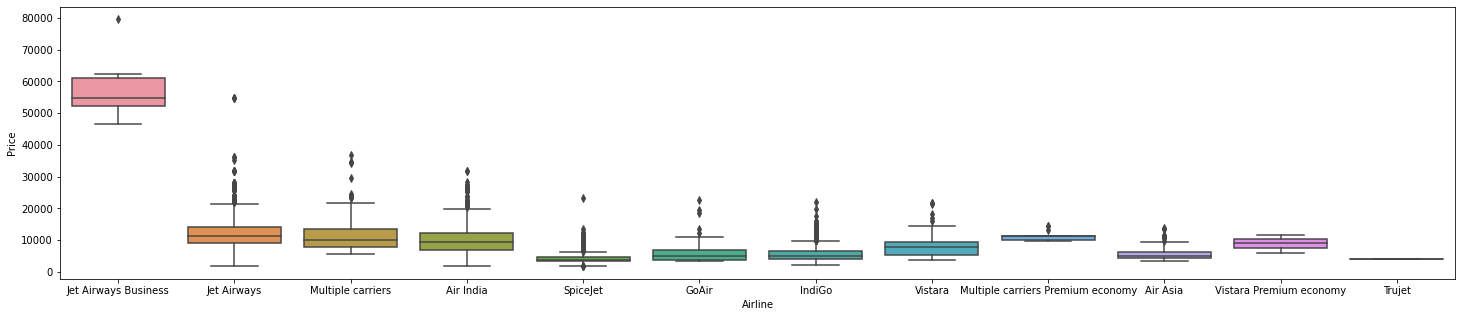

In [40]:
plt.figure(figsize=(25,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))

 Conclusion, From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

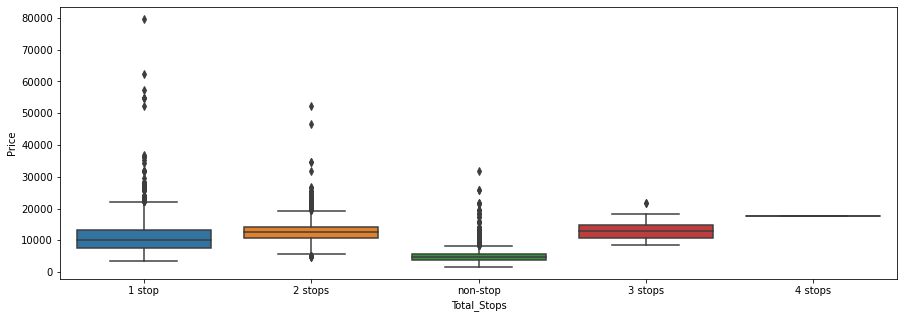

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x ='Total_Stops',data = df .sort_values('Price',ascending=False))

In [42]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

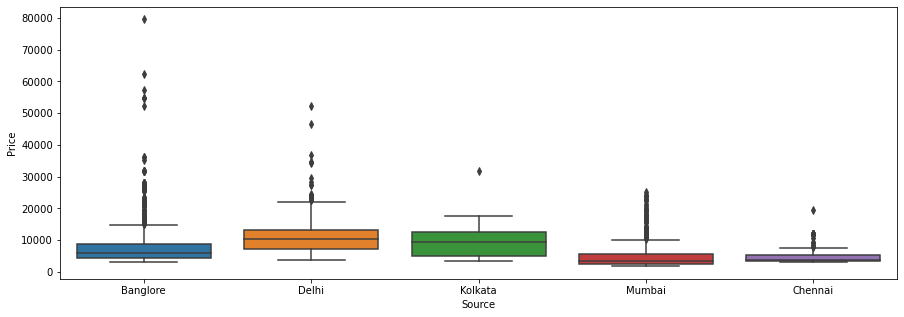

In [44]:
# Source vs Price
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x ='Source',data = df.sort_values('Price',ascending=False))

As we can see that the bangalore has the highest fluctuation and delhi has the highest median as compared to the other cities in the india

In [45]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source=pd.get_dummies(categorical['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

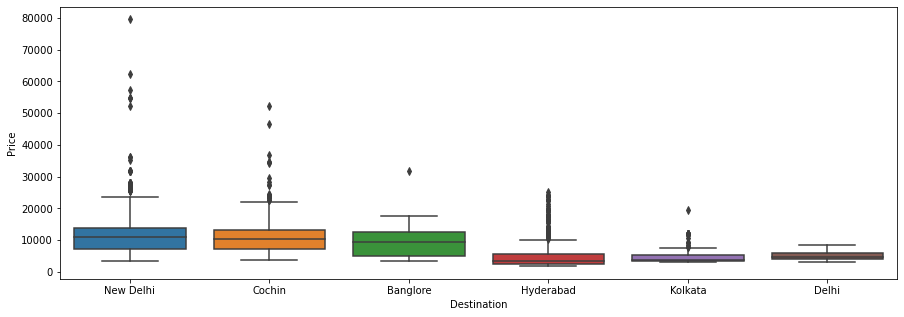

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x ='Destination',data = df.sort_values('Price',ascending=False))

As we can see from the destination plot, the flights going to NewDelhi is highest and the flights going to the Kolkata is lowest

In [48]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [49]:
categorical['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

As we can see few flights have many routes, so we will seperate each of them as it helps the machine learning algorithm

In [50]:
# importing warnings as to avoid the further warning
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [51]:
# Seperating the route column using the str.split() method

# route 1
categorical['Route_1']=categorical['Route'].str.split('→').str[0]

# route 2
categorical['Route_2']=categorical['Route'].str.split('→').str[1]

# route 3
categorical['Route_3']=categorical['Route'].str.split('→').str[2]

# route 4
categorical['Route_4']=categorical['Route'].str.split('→').str[3]

# route 5
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [52]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


As we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding

In [53]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [54]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [55]:
for i in ['Route_3', 'Route_4','Route_5']:
    categorical[i].fillna('None', inplace = True)

In [56]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None


In [57]:
#now extract how many categories in each cat_feature

for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 



In [58]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels

In [59]:
encoder = LabelEncoder()

In [60]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [62]:
drop_column(categorical,'Additional_Info')

In [63]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [64]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [65]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [66]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,0,34,8,13,5


In [67]:
# Concatenate dataframe --> categorical + Airline + Source + Destination

df_updated = pd.concat([categorical,Airline,Source,Destination,df[continous_column]],axis=1)
df_updated.head()

,Airline,Source,Destination,Route,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,0,13,29,13,5,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,2,25,1,3,5,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,3,32,4,5,5,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,2,34,3,13,5,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,0,34,8,13,5,...,1,13302,3,1,16,50,21,35,4,45


In [68]:
# dropping the columns which is having the non-numerical value which would be easier in predicting the price

drop_column(df_updated,'Airline')
drop_column(df_updated,'Source')
drop_column(df_updated,'Destination')
drop_column(df_updated,'Route')

In [69]:
df_updated.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [70]:
# setting the table to display all the columns present the dataset
pd.set_option('display.max_columns',35)

In [71]:
df_updated

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2,5,29,13,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107,4,9,19,55,22,25,2,30
10679,0,2,5,29,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145,27,4,20,45,23,20,2,35
10680,0,0,13,29,13,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229,27,4,8,20,11,20,3,0
10681,0,0,13,29,13,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12648,3,1,11,30,14,10,2,40


In [72]:
df_updated.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Price', 'Journey_day', 'Journey_month', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

### Outlier detection

In [73]:
def plot(df_updated,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

<Figure size 2160x1440 with 0 Axes>

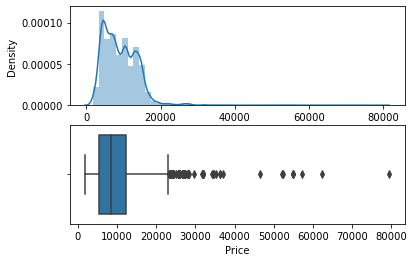

In [74]:
plt.figure(figsize=(30,20))
plot(df,'Price')

In [75]:
# As above 40000 there were many outliers present so will replace them with median value
df_updated['Price'] = np.where(df_updated['Price'] >= 40000, df_updated['Price'].median(), df_updated['Price'])

<Figure size 2160x1440 with 0 Axes>

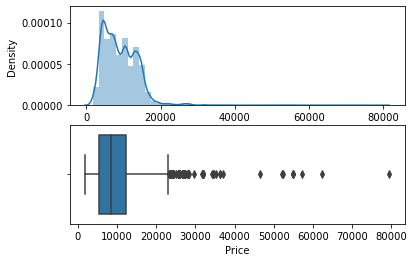

In [76]:
plt.figure(figsize=(30,20))
plot(df,'Price')

As we see that the outliers above 40000 are dropped!

In [77]:
# In this step, we assign the independent variable(X) & the dependent variable (y)...

# assigning the independent variable(X) to all the column except price column.
X = df_updated.drop('Price',axis=1)

# assigning the dependent variable (y) to the ‘price’ column
y = df_updated['Price']

In [78]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [79]:
X.shape

(10682, 34)

In [80]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

### Feature Selection
   Finding out the best feature which will contribute and have good relation with target variable. 
    
### Why to apply Feature Selection?
   To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features

In [81]:
from sklearn.feature_selection import mutual_info_classif

#### mutual_info_classif :
It calculates mutual information value for each of independent variables with respect to dependent variable, and selects the ones which has most information gain. 


In [82]:
mutual_info_classif(X,y)

array([2.15670650e+00, 2.03514828e+00, 2.76313346e+00, 2.27069900e+00,
       1.43629200e+00, 7.22682782e-01, 7.88444023e-01, 1.06121843e-01,
       6.53540064e-01, 9.26807722e-01, 1.43604866e-03, 5.52955536e-01,
       2.11371177e-02, 3.05184161e-01, 0.00000000e+00, 2.23336151e-01,
       1.28351700e-02, 1.74399054e-01, 1.51750545e+00, 8.82758675e-01,
       2.89495192e-01, 1.55326674e+00, 4.11294821e-01, 2.86029175e-01,
       1.67413913e-01, 3.64396374e-01, 1.04597874e+00, 8.41831638e-01,
       1.44443695e+00, 1.18494586e+00, 1.85734508e+00, 1.51297697e+00,
       1.80199801e+00, 1.07309967e+00])

In [83]:
important = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
important

,0
Total_Stops,2.138076
Route_1,2.022974
Route_2,2.793427
Route_3,2.329795
Route_4,1.499786
Route_5,0.737130
Air India,0.746293
GoAir,0.096828
IndiGo,0.671683
Jet Airways,0.910745


In [84]:
# sorting the values according to the importance i.e. descending order
important.columns=['importance']
important.sort_values(by ='importance',ascending=False)

,importance
Route_2,2.793427
Route_3,2.329795
Total_Stops,2.138076
Route_1,2.022974
Arrival_Time_hour,1.867624
Duration_hours,1.796709
Arrival_Time_minute,1.546065
Cochin,1.544339
Delhi,1.516189
Route_4,1.499786


# Training the Machine Learning model

## 1. Linear Regression Model 

   `Linear regression` is perhaps one of the most well known and well understood algorithms in statistics and `machine learning`. The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). As such, both the input values (x) and the output value are numeric.



The main difference between `Regression` and `Classification` algorithms are :

`Regression` algorithms are used to predict the continuous values such as price, salary, age, etc. 

`Classification` algorithms are used to predict/Classify the discrete values such as Male or Female, True or False, Spam or Not Spam, etc.

As we are predicting the price here. Hence we are selecting the RandomForest Regressor Model to predict the price.

### Importing the required libraries for training the model!

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [103]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2)

In [104]:
# fit the ml_model with x and y data
model = LinearRegression()
model.fit(X_train1,y_train1)
print('Training score : {}'.format(model.score(X_train1,y_train1)))
    
# test the output by changing values
y_prediction1 = model.predict(X_test1)
print('predictions are: \n {}'.format(y_prediction1))
print('\n')

Training score : 0.6156463402980732
predictions are: 
 [ 2549.67299239 12667.16217622  9218.88583227 ...  5887.92748075
  5192.98214518  3722.77608902]




In [105]:
# predicting the r2_score
r2_score1 = metrics.r2_score(y_test1,y_prediction1)
print('r2 score: {}'.format(r2_score1))

r2 score: 0.6158494874345248


In [106]:
# calculating the mean absolute error
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test1,y_prediction1))
    
# calculating the mean squared error
print('Mean Squared Error :', metrics.mean_squared_error(y_test1,y_prediction1))

# calculating the root mean squared error
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test1,y_prediction1)))

Mean Absolute Error : 1930.0423049488431
Mean Squared Error : 7480170.7207528325
Root Mean Squared Error : 2734.990076902078


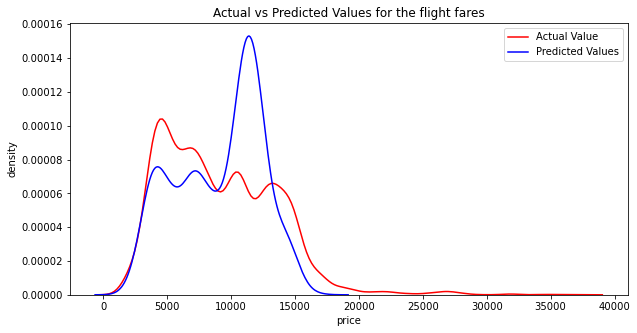

In [107]:
plt.figure(figsize=(10, 5))
ax = sns.distplot(y, hist=False, bins=100, color="red", label ='Actual Value')
sns.distplot(y_prediction1, hist=False, bins=100, color="blue", label ='Predicted Values' , ax=ax)
plt.xlabel('price')
plt.ylabel('density')
plt.title('Actual vs Predicted Values for the flight fares')
plt.legend()
plt.show()
plt.close()

In [108]:
# Calculate the absolute errors
errors = abs(y_prediction1 - y_test1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test1)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1930.04 degrees.
Accuracy: 77.06 %.


Hence using the linear regression model we have obtained an accuracy of 77% which is not upto the mark. Hence we can improve this accuracy by considering another Machine Learning models such as the Random Forest Model, Decision Tree model etc.

### We will be considering the Random Forest Model.

## 2. Random Forest Model

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

The main difference between `Regression` and `Classification` algorithms are :

`Regression` algorithms are used to predict the continuous values such as price, salary, age, etc. 

`Classification` algorithms are used to predict/Classify the discrete values such as Male or Female, True or False, Spam or Not Spam, etc.

As we are predicting the price here. Hence we are selecting the RandomForest Regressor Model to predict the price.

### Importing the required libraries for training the model!

In [83]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [84]:
# split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [85]:
# fit the ml_model with x and y data
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train,y_train)
print('Training score : {}'.format(model.score(X_train,y_train)))
    
# test the output by changing values
y_prediction = model.predict(X_test)
print('predictions are: \n {}'.format(y_prediction))
print('\n')

Training score : 0.9528799610592407
predictions are: 
 [ 3793.35       14080.1        14417.365      ...  8061.54
 15841.025       5868.89966667]




In [86]:
# predicting the r2_score
r2_score = metrics.r2_score(y_test,y_prediction)
print('r2 score: {}'.format(r2_score))

r2 score: 0.8198976956468573


In [87]:
# calculating the mean absolute error
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test,y_prediction))
    
# calculating the mean squared error
print('Mean Squared Error :', metrics.mean_squared_error(y_test,y_prediction))

# calculating the root mean squared error
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

Mean Absolute Error : 1176.2915252461105
Mean Squared Error : 3515975.9805682134
Root Mean Squared Error : 1875.0935924823095


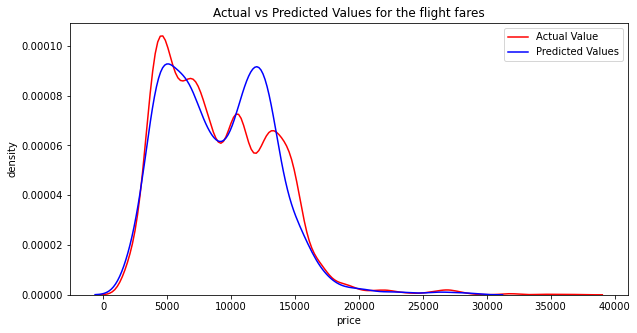

In [88]:
plt.figure(figsize=(10, 5))
ax = sns.distplot(y, hist=False, bins=100, color="red", label ='Actual Value')
sns.distplot(y_prediction, hist=False, bins=100, color="blue", label ='Predicted Values' , ax=ax)
plt.xlabel('price')
plt.ylabel('density')
plt.title('Actual vs Predicted Values for the flight fares')
plt.legend()
plt.show()
plt.close()

In [89]:
# Calculate the absolute errors
errors = abs(y_prediction - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1176.29 degrees.
Accuracy: 87.14 %.


### Using Random Forest Regression model we have obtained an accuracy of 87.14%.

# Conclusion 

   This complete notebook represents an exploratory data analysis (EDA) process to put together the patterns related to the Flight fare prediction. We have dealt with the flight fare data `"airData_Train.xlsx"` and grouped only a single column that is with the `price` feature. The purpose of this study is to analyze the dataset and obtain important insights form it. As visual representations are flexible and easy to understand, the results or outputs produced in the form of graphs can help people comprehend the current situation insights easily. The dataset used may not be an updated version; hence the inferences may vary from time to time as graphs can be generated as the data increases. As the amount of data increases, the trends may change and lead to different inferences and solutions. Hence we considered two different Machine learning models, the accuracy of the `LinearRegression model` was not upto the mark.So we decided to use the `RandomForest Regressor model` which led to a very good accuracy of `87%` which is a pretty cool accuracy for an Machine Learning Model.

## Reference 

#### https://www.udemy.com/course/machine-learning-real-world-projects-in-python/

#### https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

#### https://www.researchgate.net/publication/337821411_Predicting_Flight_Prices_in_India

# Thank you!